# Análise exploratória de casos de Dengue notificado pelo SUS

Neste tutorial vamos explorar como começar a entender a descrição de casos do sis tema de notificação de agravos do SUS, o SINAN. Estes dados são bastante ricos e a [documentação](www.sgc.goias.gov.br/upload/arquivos/2013-08/dengue2.pdf) sobre o significado de cada uma das variáveis pode ser encontrada [aqui](www.sgc.goias.gov.br/upload/arquivos/2013-08/dengue2.pdf).

In [1]:
from pysus.ftp.databases.sinan import SINAN
import keplergl
import pandas as pd
import geopandas as gpd
%pylab inline

sinan = SINAN().load()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Primeiro vamos começar pelo carregamento dos dados a partir do servidor do DataSUS. Como o dado está no formato Parquet, nós vamos utilizar a biblioteca pandas para visualizar os dados em um Dataframe:

In [2]:
cols = [
    'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'ID_MUNICIP',
    'DT_SIN_PRI', 'SEM_PRI', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT',
    'latitude', 'longitude',
    'NM_DISEASE'
]
casos = sinan.download(sinan.get_files('DENG', 2010)).to_dataframe()

100%|████████████████████████████████████████████████████████████████| 30.5M/30.5M [00:00<00:00, 6.93GB/s]


/home/bida/micromamba/envs/pysus/lib/python3.11/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/home/bida/micromamba/envs/pysus/lib/python3.11/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/bida/micromamba/envs/pysus/lib/python3.11/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


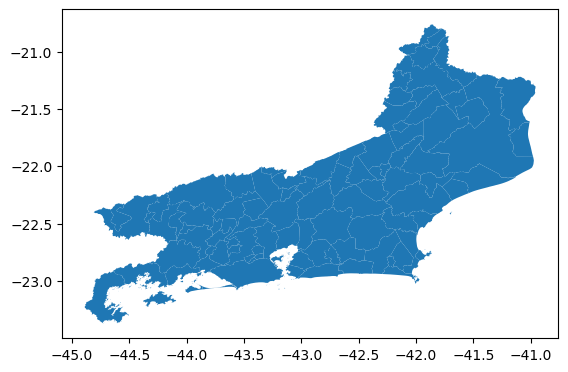

In [3]:
munrj = gpd.read_file('./rj-municipalities.json')
munrj.plot();

In [4]:
casos.head()

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,PLASMATICO,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,TP_SISTEMA
0,2,A90,2010-04-14,201015,2010,35,352510,1348,2038641,2010-04-07,...,,,,,,9,,,,1
1,2,A90,2010-04-15,201015,2010,35,352510,1348,2038641,2010-04-09,...,,,,,,9,,,,1
2,2,A90,2010-04-13,201015,2010,35,352510,1348,2038641,2010-04-09,...,,,,,,9,,,,1
3,2,A90,2010-04-13,201015,2010,35,352510,1348,2038641,2010-04-08,...,,,,,,9,,,,1
4,2,A90,2010-04-20,201016,2010,35,352510,1348,2038641,2010-04-15,...,,,,,,,,,,1


Estes dados correspondem a todos os casos de dengue notificado ao SUS durante um período. Neste caso de 2015 a 2016. Para podermos tratar adequadamente estes dados para fins de visualização ou análise precisamos corrigir os tipos das colunas. Por exemplo vamos converter as datas.

In [5]:
casos.DT_NOTIFIC = pd.to_datetime(casos.DT_NOTIFIC)
casos.DT_SIN_PRI = pd.to_datetime(casos.DT_SIN_PRI)

Para poder organizar os dados temporalmente, é útil indexar a tabela por alguma variável temporal

In [6]:
casos = casos.set_index('DT_NOTIFIC')

Agora podemos plotar o número de casos por semana de dengue na cidade do Rio de Janeiro.

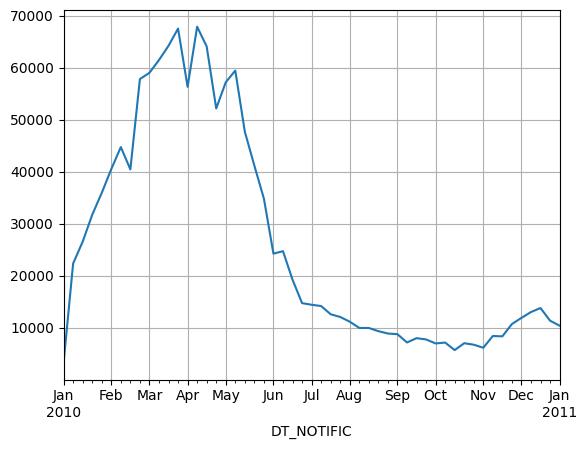

In [7]:
casos.ID_AGRAVO.resample('1W').count().plot(grid=True);

Suponhamos agora que desejamos visualizar em um mapa os casos que ocorreram, por exemplo entre janeiro e março de 2015